# Screening the Human Proteome for Novel Nuclear Export Signals
*Authors: Daniel Levin, Imri Shuval, Shira Gelbstein and Ron Levin*
*Date: June 19, 2025*
---
### Section 1: Setup and Goal
**Goal:**
The goal of this project is to use a deep learning model to screen the entire human proteome for undiscovered Nuclear Export Signals (NES) motifs.

In [1]:
import pandas as pd
from IPython.display import display

# Fix import path to access modules in parent directory
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))  # Add parent directory to path

# Now import from the correct location
from plotting_utils import (
    plot_score_distribution,
    plot_roc_curve,
    plot_score_boxplot
)

---
### Section 2: Data Loading and Preprocessing
**Data Source:**
We load the single, raw output file from the pipeline. For this test, we are using `todo_fill_here.csv`. This file contains the raw model logits. Our first step is to preprocess this data to calculate the prediction probabilities.

In [2]:
# 1. Load the raw results file that pipeline.py outputs
result_path = "../test_output_transformer_classifier_w-20_emb-2560.csv"
df = pd.read_csv(result_path)
# 2. Display 5 random rows from model's output csv
display(df.sample(5))
# processed_df.info()

,score,predictions (threshold 0.5),labels
906,0.765007,1,1.0
666,0.999048,1,1.0
211,0.994192,1,0.0
831,0.999195,1,1.0
1474,0.994917,1,1.0


---
### Section 3: Performance Analysis - How Good is Our Model?
First, we'll validate our model's performance by generating an ROC curve. This uses the true `labels` column from our test data to see how well the predicted probabilities distinguish between the two classes.

Saved ROC curve to analysis_plots/roc_curve.png


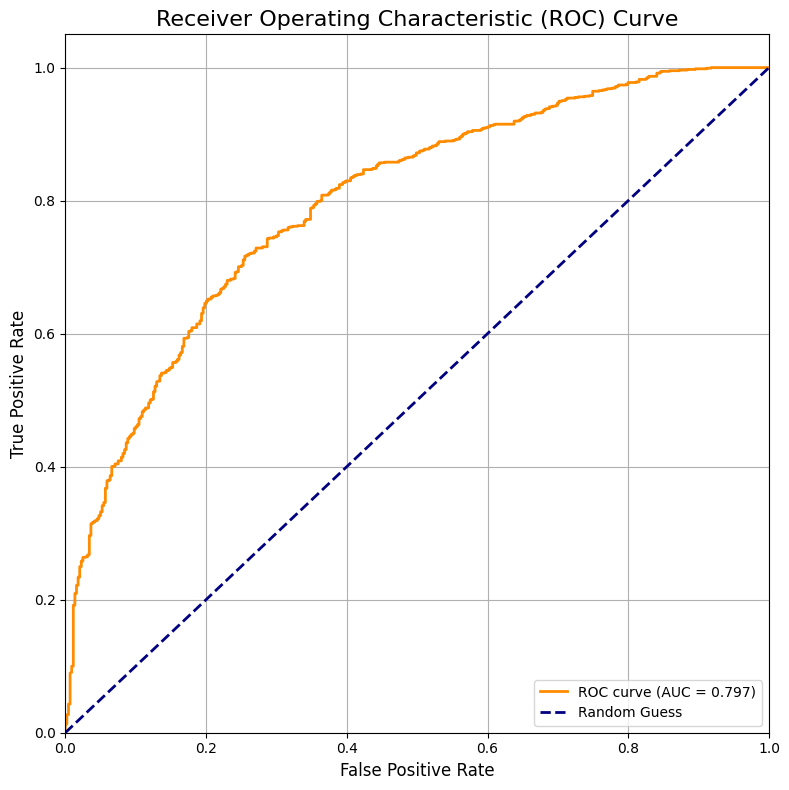

In [3]:
# The ROC curve function now takes the entire processed DataFrame
output_path = "analysis_plots/roc_curve.png"
plot_roc_curve(df, output_path=output_path)

---
### Section 4: Analysis of Prediction Distributions
Now we'll visualize the distribution of scores for the true positive cases versus the true negative cases to see how well they are separated.

Saved score distribution plot to analysis_plots/dummy_score_distribution.png
Saved box plot to analysis_plots/dummy_boxplot.png


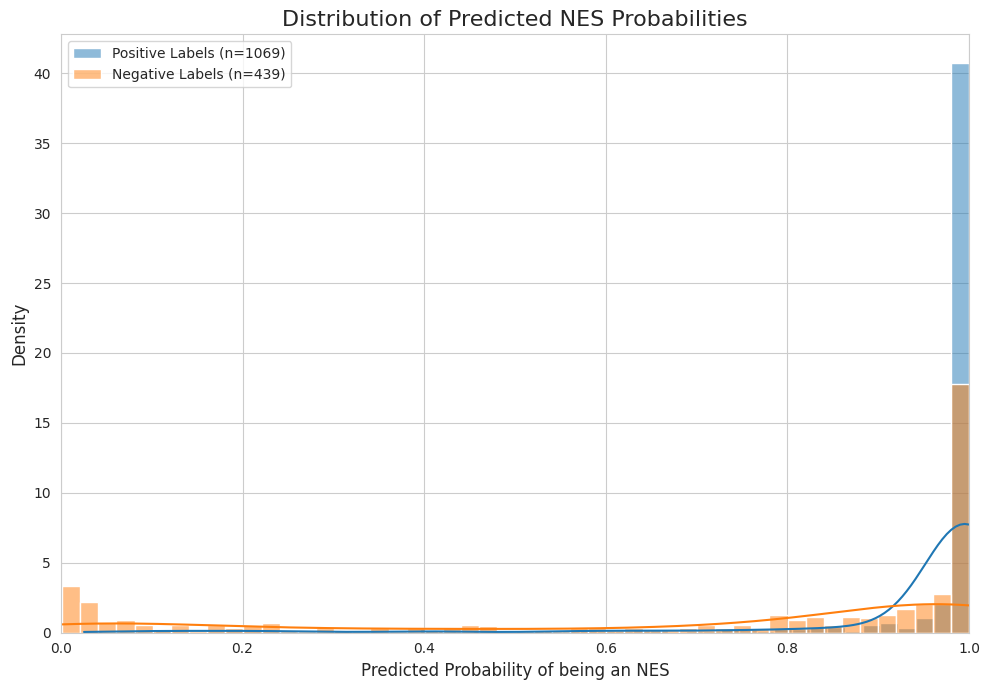

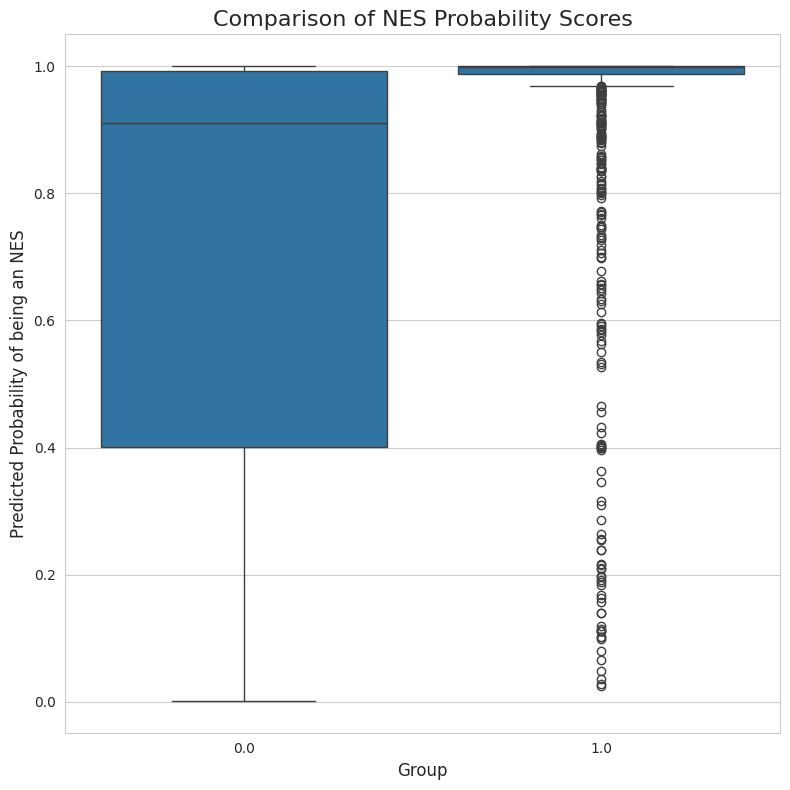

In [4]:
# --- Distribution Plot ---
# We first split the DataFrame into two groups based on the true labels.
positive_df = df[df['labels'] == 1]
negative_df = df[df['labels'] == 0]

dist_data_dict = {
    'Positive Labels': positive_df,
    'Negative Labels': negative_df
}
output_path1 = "analysis_plots/dummy_score_distribution.png"
plot_score_distribution(dist_data_dict, output_path=output_path1)

# --- Box Plot ---
# The box plot can directly use the 'labels' column for grouping.
output_path2 = "analysis_plots/dummy_boxplot.png"
plot_score_boxplot(df, group_column='labels', output_path=output_path2)

**Interpretation:**
The plots show a [todo] separation. The distribution for 'Positive Labels' is shifted towards higher probabilities, while the 'Negative Labels' are clustered near zero. This [todo] our model is [todo] the [todo] patterns.

---
### Section 5: Identifying High-Confidence Candidates from a Real Screen
The final step in a real analysis would be to filter the full proteome screening results for the most promising candidates.

In [8]:
# This cell demonstrates how we would filter the final results.

confidence_threshold = 0.90

high_confidence_hits = df[df['score'] >= confidence_threshold]

print(f"Found {len(high_confidence_hits)} high-confidence candidates (score >= {confidence_threshold}).")

if not high_confidence_hits.empty:
    # Sort by score and display the Top 15 candidates
    top_candidates = high_confidence_hits.sort_values(by='score', ascending=False)
    display(top_candidates.head(15))

Found 1162 high-confidence candidates (score >= 0.9).


,score,predictions (threshold 0.5),labels
587,1.000000,1,1.0
983,1.000000,1,1.0
661,1.000000,1,1.0
1030,1.000000,1,1.0
544,1.000000,1,1.0
...,...,...,...
206,0.904041,1,0.0
1477,0.904040,1,1.0
389,0.902915,1,0.0
780,0.901668,1,1.0
